In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
import os
import pandas as pd
from datetime import datetime

# Ruta de la carpeta que contiene los archivos
folder_path = r'C:\Users\Aleja\OneDrive\Escritorio\Cartera\Proyecto - Análisis exploratorio'

# Listar todos los archivos .xlsx en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Crear una lista para almacenar los DataFrames
dfs = []

# Función para extraer el mes, año y la fecha completa del nombre del archivo
def extract_date_from_filename(filename):
    # Suponiendo que el formato es "Proyección de Vencimientos DDMMYYYY.xlsx"
    base_name = os.path.splitext(filename)[0]
    date_str = base_name.split()[-1]  # Extraer "DDMMYYYY"
    if len(date_str) == 8:  # Verificar que la longitud sea correcta
        try:
            # Convertir la cadena a un objeto datetime
            date_obj = datetime.strptime(date_str, '%d%m%Y')
            # Formatear a "mes año" (ej. "feb 2023")
            month_year = date_obj.strftime('%b %Y').lower()  # %b es el mes abreviado en inglés
            # Obtener la fecha completa en formato 'YYYY-MM-DD'
            full_date = date_obj.strftime('%Y-%m-%d')
            return month_year, full_date
        except ValueError:
            return None, None
    return None, None

# Leer cada archivo y agregar su DataFrame a la lista
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    
    # Extraer el mes y año y la fecha completa del nombre del archivo
    month_year, full_date = extract_date_from_filename(file_name)
    if month_year and full_date:
        df['mes_año'] = month_year  # Agregar la columna con mes y año
        df['fecha_completa'] = full_date  # Agregar la columna con la fecha completa
    
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))


       codigo                            nombre   cu     documento  \
0   900692604  AAA MAQUINARIAS & MATERIALES SAS  1.0  FC-003657-01   
1         NaN                               NaN  NaN           NaN   
2  1121214895        ABOU ABBAS ABOU HAMIA OMAR  1.0  FE-012956-06   
3         NaN                               NaN  NaN           NaN   
4    15877276              ACHO ARAUJO DIOMEDES  1.0  FE-013145-05   

       fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  \
0  2022-DIC-31  2020-FEB-28       1096           0       0       0       0   
1          NaN          NaN          0           0       0       0       0   
2  2022-DIC-31  2023-MAR-28        -28      201000       0       0       0   
3          NaN          NaN          0           0       0       0       0   
4  2022-DIC-31  2023-MAR-10        -10      260000       0       0       0   

   mas_de_90  vend_tmp    total   mes_año fecha_completa  
0    2128950       NaN  2128950  feb 2023     2023-

In [3]:
#Organizar por código
df = df.sort_values(by="codigo")

In [4]:
# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))

              codigo                       nombre   cu     documento  \
8487   00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-04   
6919   00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-04   
11780  00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-03   
8486   00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-03   
18592  00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-04   

           fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  \
8487   2022-DIC-31  2018-JUL-22       2170           0       0       0   
6919   2022-DIC-31  2018-JUL-22       1804           0       0       0   
11780  2022-DIC-31  2018-JUN-22       1684           0       0       0   
8486   2022-DIC-31  2018-JUN-22       2200           0       0       0   
18592  2022-DIC-31  2018-JUL-22       1774           0       0       0   

       _61_90  mas_de_90  vend_tmp   total   mes_año fecha_completa  
8487        0     125000       NaN  375000  jun 2024

In [5]:
# Mostrar las últimas filas filas del DataFrame combinado
print(df.tail(5))

      codigo                               nombre  cu documento fec_ela  \
29803    NaN                                  NaN NaN       NaN     NaN   
29804    NaN  Empresa:CREDITOS PARRA Y CIA S.A.S. NaN       NaN     NaN   
29805    NaN  Cuenta:130515   Cartera de clientes NaN       NaN     NaN   
29806    NaN                              General NaN       NaN     NaN   
29807    NaN               2024.08.06 03:05:24 PM NaN       NaN     NaN   

      fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  mas_de_90  \
29803      NaN          0           0       0       0       0          0   
29804      NaN          0           0       0       0       0          0   
29805      NaN          0           0       0       0       0          0   
29806      NaN          0           0       0       0       0          0   
29807      NaN          0           0       0       0       0          0   

       vend_tmp  total   mes_año fecha_completa  
29803       NaN      0  dec 2023     2023-

In [6]:
# Corregir los tipos de datos
df['codigo'] = df['codigo'].astype(str)
df['nombre'] = df['nombre'].astype(str)
df['documento'] = df['documento'].astype(str)

In [7]:
# Visualizar estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29808 entries, 8487 to 29807
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          29808 non-null  object 
 1   nombre          29808 non-null  object 
 2   cu              23886 non-null  float64
 3   documento       29808 non-null  object 
 4   fec_ela         23886 non-null  object 
 5   fec_vcto        23886 non-null  object 
 6   dias_vcto       29808 non-null  int64  
 7   sin_vencer      29808 non-null  int64  
 8   _01_30          29808 non-null  int64  
 9   _31_60          29808 non-null  int64  
 10  _61_90          29808 non-null  int64  
 11  mas_de_90       29808 non-null  int64  
 12  vend_tmp        14298 non-null  float64
 13  total           29808 non-null  int64  
 14  mes_año         29808 non-null  object 
 15  fecha_completa  29808 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 3.9+ MB


In [8]:
# Eliminar columnas innecesarias
df = df.drop(columns=['nombre', 'cu', 'vend_tmp'], index=1)

In [9]:
# Ver na por columna
df.isna().sum()

codigo               0
documento            0
fec_ela           5921
fec_vcto          5921
dias_vcto            0
sin_vencer           0
_01_30               0
_31_60               0
_61_90               0
mas_de_90            0
total                0
mes_año              0
fecha_completa       0
dtype: int64

In [10]:
# Eliminar n/a
df = df.dropna()

In [11]:
# Primero, crea un diccionario de los meses en español

meses_esp = {'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05', 
             'JUN': '06', 'JUL': '07', 'AGO': '08', 'SEP': '09', 'OCT': '10', 
             'NOV': '11', 'DIC': '12'}

# Función para reemplazar el mes en la cadena de fecha
def convertir_fecha(fecha):
    for mes, num in meses_esp.items():
        if mes in fecha.upper():
            fecha = fecha.upper().replace(mes, num)
    return fecha

# Aplicar la función a las columnas de fecha antes de convertirlas a datetime
df['fec_ela'] = df['fec_ela'].apply(convertir_fecha)
df['fec_vcto'] = df['fec_vcto'].apply(convertir_fecha)

# Ahora convierte a datetime usando el formato 'YYYY-MM-DD'
df['fec_ela'] = pd.to_datetime(df['fec_ela'], format='%Y-%m-%d')
df['fec_vcto'] = pd.to_datetime(df['fec_vcto'], format='%Y-%m-%d')
df['fecha_completa'] = pd.to_datetime(df['fecha_completa'], format='%Y-%m-%d')

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    17984
1     5902
Name: count, dtype: int64

In [12]:
# Calcular la diferencia en días entre 'fec_vcto' y 'fec_ela'
dif_days = np.where((df['fec_vcto'] - df['fec_ela']).dt.days>0,(df['fec_vcto'] - df['fec_ela']).dt.days,0)

# Calcular la media de la diferencia en días
df_mean = np.mean(dif_days)

print(df_mean)

184.6253453906054


In [14]:
# Imputar los valores tipo 1 en 'fec_ela' restando 30 días de 'fec_vcto' donde 'val_fec' es 1
df['fec_ela'] = np.where(df['val_fec'] == 1, df['fec_vcto'] - pd.Timedelta(days=184), df['fec_ela'])

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    23886
Name: count, dtype: int64

In [15]:
# Variables sinteticas
df['Edad_obligacion'] = (df['fecha_completa'] - df['fec_ela']).dt.days
df['%_vencido'] = (df['total'] - df['sin_vencer']) / df['total'] * 100

df = df.loc[df['total'] > 0]

df.head(5)

,codigo,documento,fec_ela,fec_vcto,dias_vcto,sin_vencer,_01_30,_31_60,_61_90,mas_de_90,total,mes_año,fecha_completa,val_fec,Edad_obligacion,%_vencido
8487,00120043775-2,FC-000686-04,2018-01-19,2018-07-22,2170,0,0,0,0,125000,375000,jun 2024,2024-06-30,0,2354,100.0
6919,00120043775-2,FC-000686-04,2018-01-19,2018-07-22,1804,0,0,0,0,125000,375000,jun 2023,2023-06-30,0,1988,100.0
18592,00120043775-2,FC-000686-04,2018-01-19,2018-07-22,1774,0,0,0,0,125000,375000,may 2023,2023-05-31,0,1958,100.0
1994,00120043775-2,FC-000686-04,2018-01-19,2018-07-22,2048,0,0,0,0,125000,375000,feb 2024,2024-02-29,0,2232,100.0
21903,00120043775-2,FC-000686-04,2018-01-19,2018-07-22,1835,0,0,0,0,125000,375000,jul 2023,2023-07-31,0,2019,100.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5751 entries, 8487 to 15250
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   codigo           5751 non-null   object        
 1   documento        5751 non-null   object        
 2   fec_ela          5751 non-null   datetime64[ns]
 3   fec_vcto         5751 non-null   datetime64[ns]
 4   dias_vcto        5751 non-null   int64         
 5   sin_vencer       5751 non-null   int64         
 6   _01_30           5751 non-null   int64         
 7   _31_60           5751 non-null   int64         
 8   _61_90           5751 non-null   int64         
 9   mas_de_90        5751 non-null   int64         
 10  total            5751 non-null   int64         
 11  mes_año          5751 non-null   object        
 12  fecha_completa   5751 non-null   datetime64[ns]
 13  val_fec          5751 non-null   int64         
 14  Edad_obligacion  5751 non-null   int64   

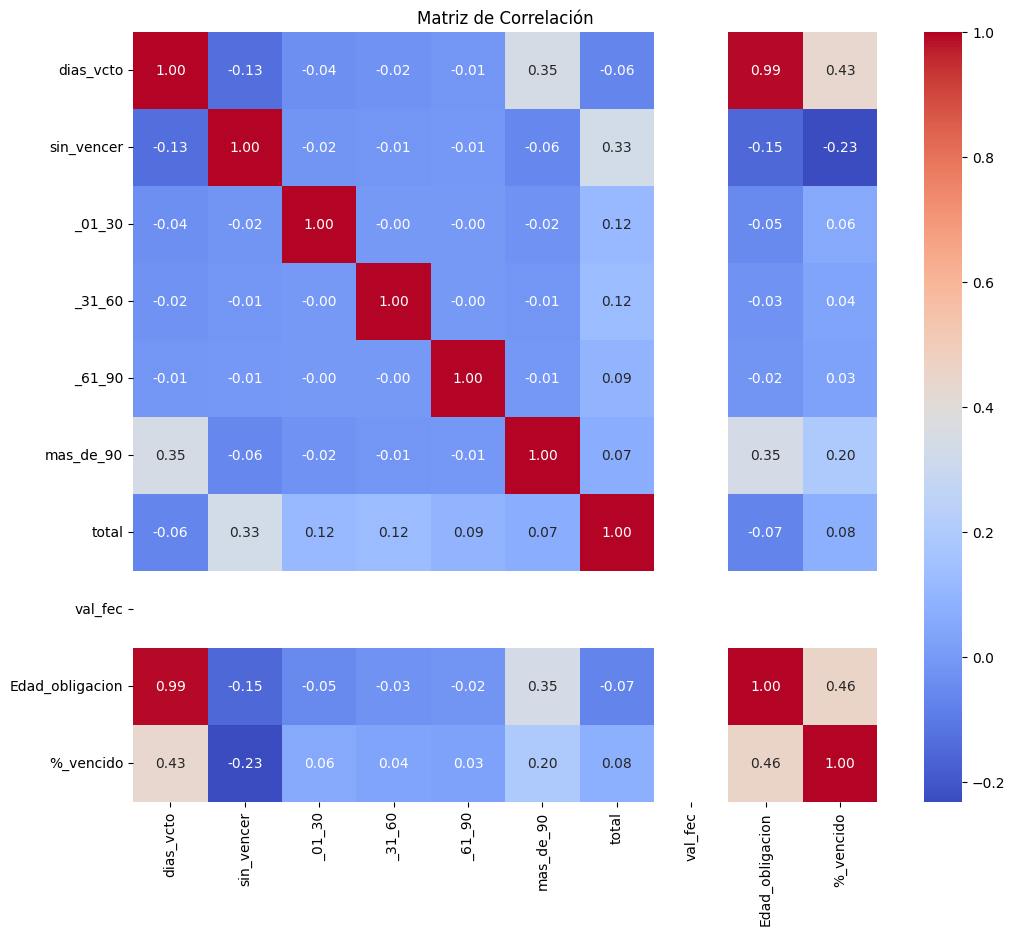

In [17]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

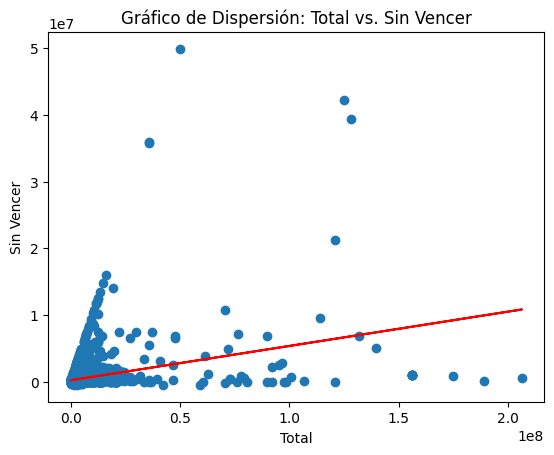

In [18]:
# Crear el gráfico de dispersión
plt.scatter(df['total'], df['sin_vencer'])

# Agregar etiquetas a los ejes
plt.xlabel('Total')
plt.ylabel('Sin Vencer')

# Agregar un título al gráfico
plt.title('Gráfico de Dispersión: Total vs. Sin Vencer')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['total'], df['sin_vencer'])
plt.plot(df['total'], slope*df['total']+intercept, color='red')

# Mostrar el gráfico
plt.show()

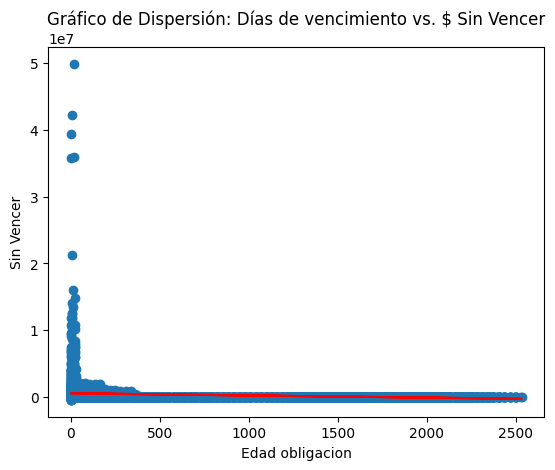

In [19]:
# Crear el gráfico de dispersión
plt.scatter(df['Edad_obligacion'], df['sin_vencer'])

# Agregar etiquetas a los ejes
plt.xlabel('Edad obligacion')
plt.ylabel('Sin Vencer')

# Agregar un título al gráfico
plt.title('Gráfico de Dispersión: Días de vencimiento vs. $ Sin Vencer')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Edad_obligacion'], df['sin_vencer'])
plt.plot(df['Edad_obligacion'], slope*df['Edad_obligacion']+intercept, color='red')

# Mostrar el gráfico
plt.show()